# Heart Disease Classification Analysis

## Team Members
- Omar Baher Hussein 21P0315
- Saifeldin Mohamed Yousry 21P0362
- Mohamed Ehab Badr 21P0375
- Mohamed Khaled ElHelaly 21P0185
- Abdallah Ahmed Hamdy 21P0333
- Ahmed Hossam ElDin 21P0271

## Introduction
Heart disease remains a leading cause of mortality worldwide, resulting in millions of deaths every year. Early detection and accurate classification of heart disease are critical in preventing severe complications and improving patient outcomes. Traditional methods often rely heavily on manual intervention from skilled medical professionals, which can be time-consuming and prone to human error.

Machine learning presents an opportunity to address these limitations by automating the prediction process with high accuracy and at scale. However, predicting heart disease using machine learning faces several challenges:
- **High Dimensionality of Data:** Medical datasets often include a large number of features that may or may not be directly relevant.
- **Imbalanced Datasets:** Heart disease datasets often have a disproportionate number of healthy versus affected individuals.
- **Outliers and Noisy Data:** Medical datasets can include inconsistencies or errors that need to be handled carefully.
- **Complexity of Relationships:** The correlations between risk factors and outcomes are often non-linear and intricate, requiring sophisticated algorithms for accurate modeling.

Despite these challenges, utilizing machine learning for heart disease classification holds immense promise. Real-world applications of such tools include:
1. **Clinical Decision Support Systems (CDSS):** Assisting doctors in diagnosing heart disease and determining the best treatment plans.
2. **Risk Assessment Tools:** Identifying high-risk individuals early for preventive interventions.
3. **Remote Health Monitoring:** Empowering wearable devices that leverage trained machine learning models to provide real-time alerts to patients and doctors.
4. **Public Health Initiatives:** Supporting large-scale epidemiological studies to identify at-risk populations and target health campaigns effectively.

This notebook explores heart disease classification using three different machine learning algorithms:
1. Decision Tree Classifier
2. Naive Bayes Classifier
3. K-Nearest Neighbors (KNN) Classifier

We'll go through the following steps:
- Necessary Data Preprocessing
- Some Data Visualization
- Outlier Removal
- Feature Scaling
- Model Training and Evaluation

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score
)

np.random.seed(42)
plt.style.use('fivethirtyeight')

## Data Loading and Initial Exploration

In [19]:
df = pd.read_csv('./Dataset/heart.csv')

# Display basic info
print(df.info())
print('\nTarget Distribution:')
print(df['target'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Target Distribution:
target
1    0.544554
0    0.455446
Name: proportion, dtype: float64


## Data Visualization
#### Target Variable Distribution

Understanding the balance of the target variable is essential in any classification task, particularly for disease classification. The distribution shows the ratio of individuals with heart disease (`1`) to those without it (`0`). Identifying imbalances here is critical because:

- **Imbalanced datasets** can lead to biased models favoring the majority class. This may result in misleading metrics like high accuracy.
- **Strategies** like oversampling, undersampling, or using class weights can mitigate these issues.

Clinically, this visualization highlights the prevalence of heart disease, guiding model evaluation using appropriate metrics like precision and recall, especially when dealing with imbalances. This foundation ensures robust and reliable predictive modeling.

Text(0.5, 1.0, 'Heart Disease Distribution')

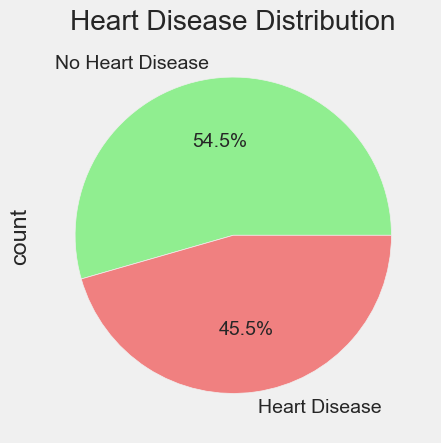

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                 labels=['No Heart Disease', 'Heart Disease'],
                                 colors=['lightgreen', 'lightcoral'])
plt.title('Heart Disease Distribution')

#### Correlation Heatmap
The correlation heatmap provides a visual summary of how numerical features in the dataset are related to one another. Correlation values range between -1 and 1:
- A **positive correlation** indicates that as one variable increases, the other tends to increase as well.
- A **negative correlation** means that as one variable increases, the other tends to decrease.
- A correlation close to 0 suggests no significant linear relationship between the two variables.

In relation to the target variable (indicating the presence of heart disease):
- Features like **cp (chest pain type)** and **thalach (maximum heart rate achieved)** show a strong **positive correlation** with the target. This suggests that higher values of these features are more likely associated with heart disease.
- Features such as **oldpeak (ST depression induced by exercise)**, **exang (exercise-induced angina)**, and **ca (number of major vessels colored by fluoroscopy)** exhibit a notable **negative correlation** with the target. This indicates that as these values increase, the likelihood of heart disease decreases.

These insights are valuable for:
- **Model Selection:** Models that benefit from feature importance (e.g., Decision Trees) can leverage these correlations to focus on impactful features.
- **Feature Engineering:** Understanding these relationships may help refine or combine features to capture underlying patterns more effectively (e.g., creating interaction terms or using transformations for the less correlated features).

By focusing on the highly correlated features, we may improve the model's predictive performance and interpretability.

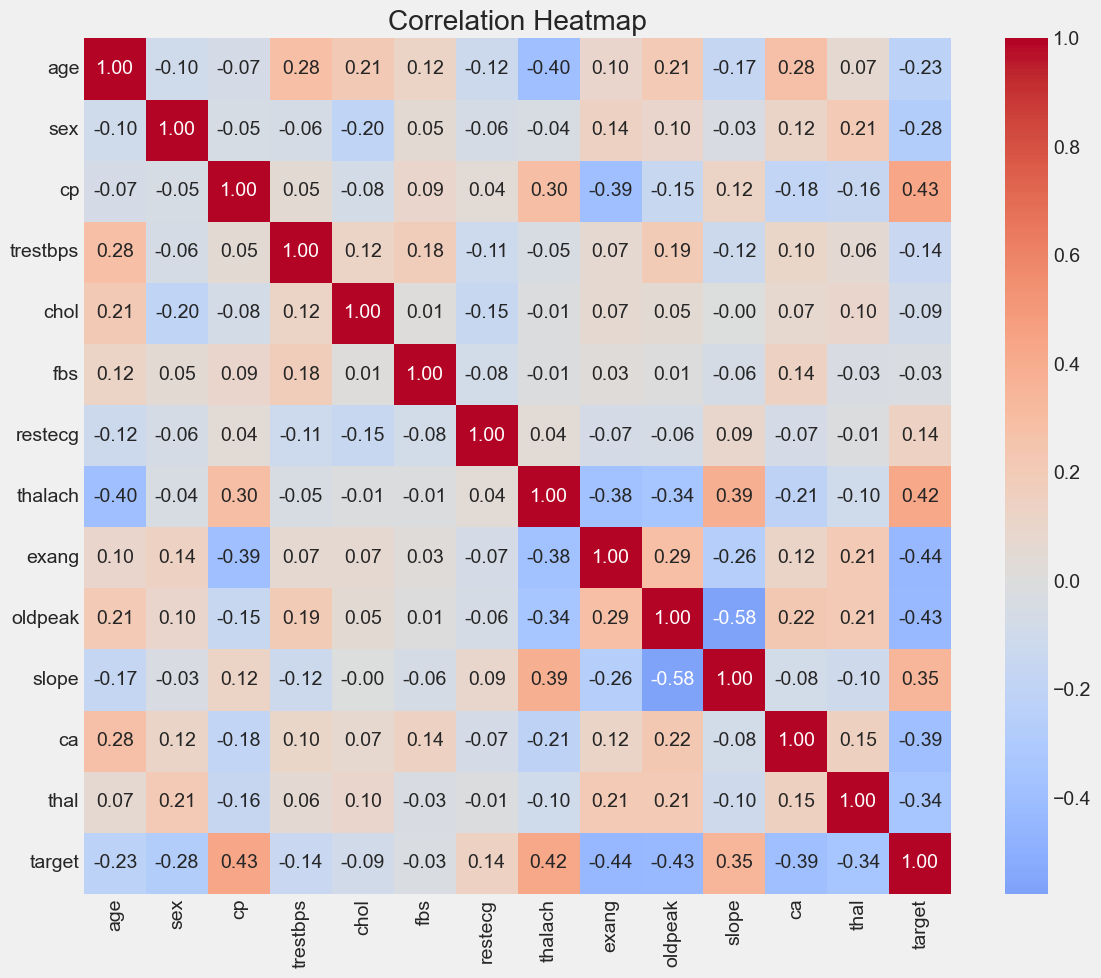

In [21]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [22]:
print("\nTop Correlations with Heart Disease:")
print(correlation_matrix['target'].sort_values(ascending=False))


Top Correlations with Heart Disease:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


#### Detailed Feature Distributions
Examining feature distributions by target class provides insights into how individual features relate to heart disease. For instance, box plots can reveal trends, such as whether specific numeric features (e.g., age, cholesterol) differ significantly between individuals with and without heart disease.

These insights are useful for:
- Identifying patterns that inform predictive modeling.
- Spotting potential outliers or skewness.
- Prioritizing features with strong class separation for model training.

This step enhances understanding and improves feature selection for building effective models.

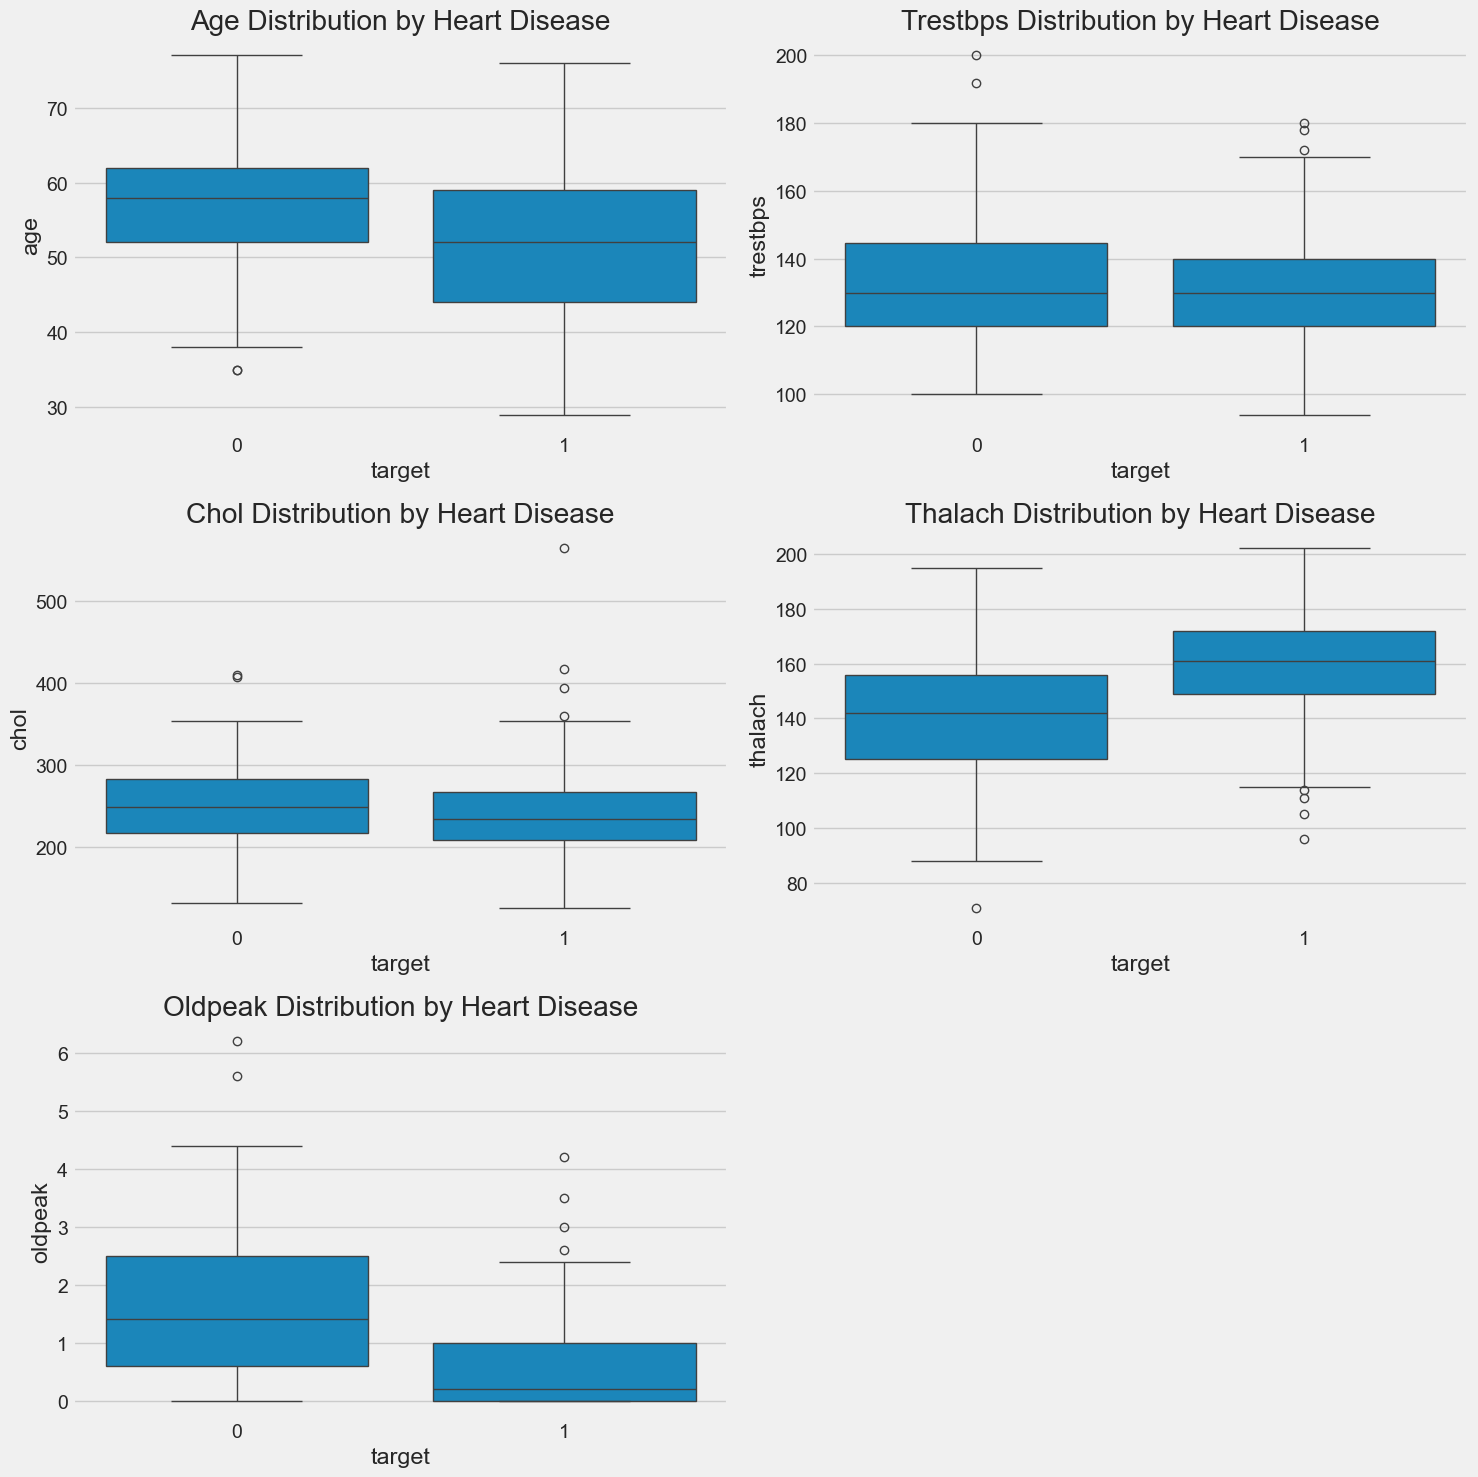

In [23]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


n_features = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)


plt.figure(figsize=(15, 5 * n_rows))
for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature.capitalize()} Distribution by Heart Disease')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Age-Based Analysis
Age is a key factor in heart disease risk. Analyzing its distribution across target classes helps identify patterns, such as whether older individuals are more likely to be diagnosed.

This analysis supports:
- Detecting age-related trends and their influence on heart disease.
- Informing feature engineering, such as creating age groups.
- Enhancing model interpretability by linking predictions to age-related risk.

By understanding age-based relationships, we can better target high-risk groups and refine our modeling approach.

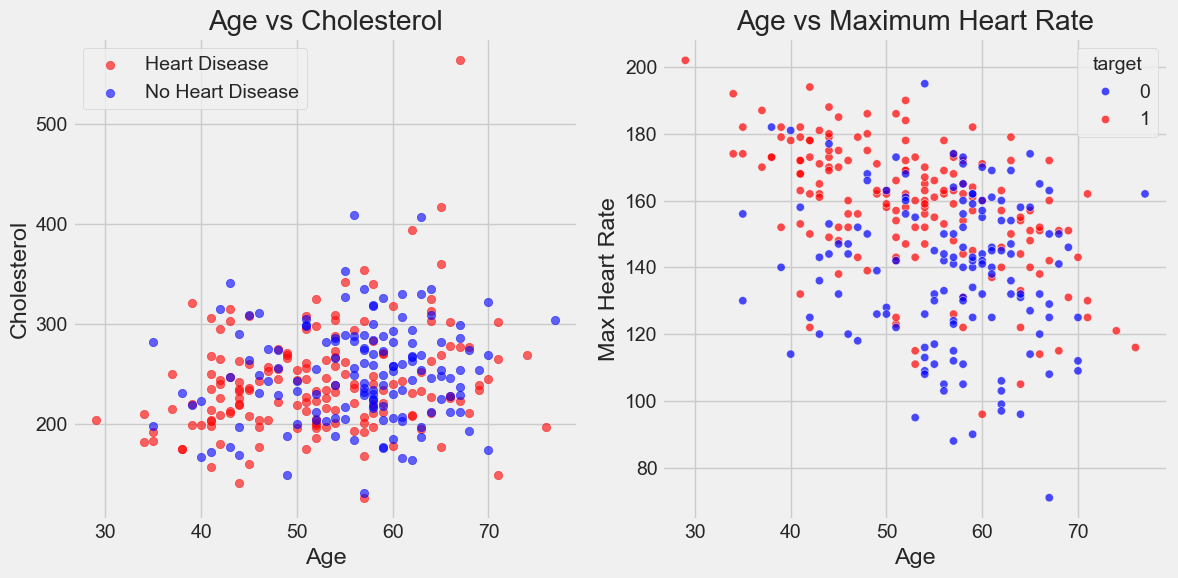

C:\Users\omarb\AppData\Local\Temp\ipykernel_5208\4294771805.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette=['lightblue', 'lightcoral'])


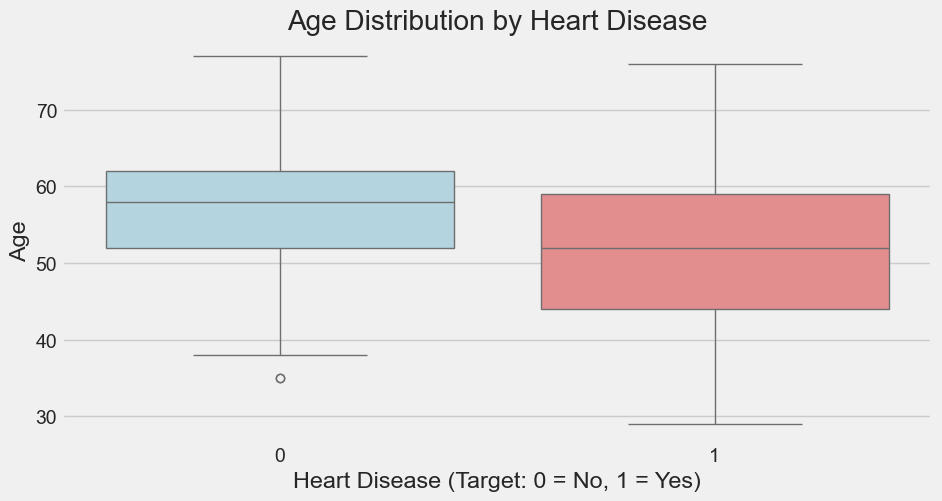

In [24]:
# Scatter plot of Age vs Cholesterol by Target (Heart Disease)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['chol'],
            label='Heart Disease', color='red', alpha=0.6)
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['chol'],
            label='No Heart Disease', color='blue', alpha=0.6)
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()

# Scatter plot of Age vs Maximum Heart Rate by Target
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette=['blue', 'red'], alpha=0.7)
plt.title('Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

plt.tight_layout()
plt.show()

# Distribution of Age by Heart Disease
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='age', data=df, palette=['lightblue', 'lightcoral'])
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease (Target: 0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

#### Gender-Based Analysis
Gender can influence heart disease risk, making it important to analyze its relationship with the target variable. This analysis highlights whether prevalence differs between males and females.

Key benefits include:
- Identifying gender-related trends and potential risk disparities.
- Supporting feature importance analysis for better model insights.
- Informing targeted strategies for high-risk groups.

Understanding these patterns helps refine modeling and ensure fairness in predictions.

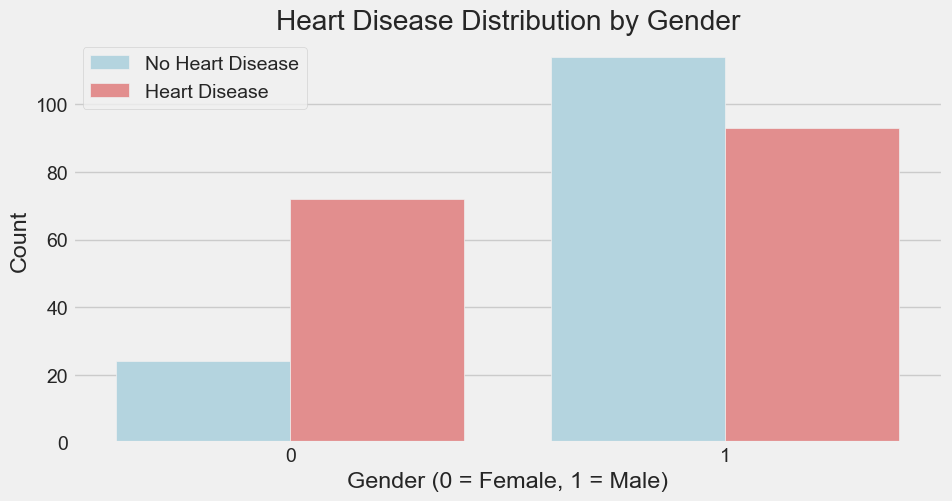

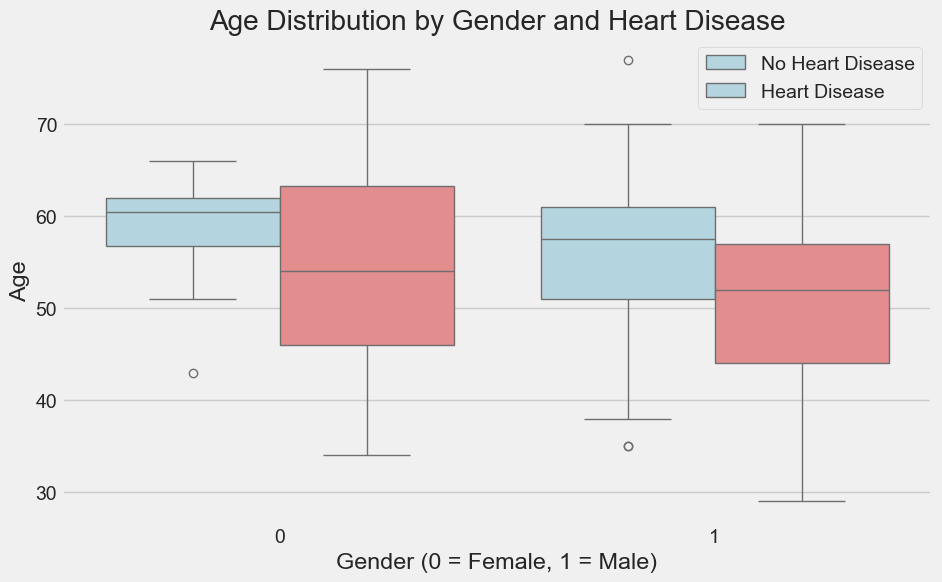


Proportion of Heart Disease by Gender (%):
sex
0    75.000000
1    44.927536
Name: target, dtype: float64


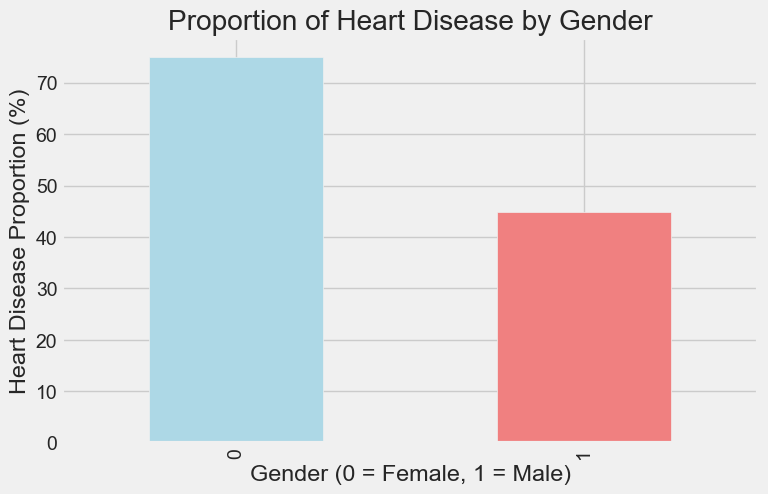

In [25]:
# Countplot for Heart Disease Distribution by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex', hue='target', palette=['lightblue', 'lightcoral'])
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# Box Plot: Age vs Gender with Heart Disease Separation
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='target', data=df, palette=['lightblue', 'lightcoral'])
plt.title('Age Distribution by Gender and Heart Disease')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# Calculate Heart Disease Proportion by Gender
gender_heart_disease = df.groupby('sex')['target'].mean() * 100
print("\nProportion of Heart Disease by Gender (%):")
print(gender_heart_disease)

# Barplot: Heart Disease Proportion by Gender
plt.figure(figsize=(8, 5))
gender_heart_disease.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Proportion of Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Heart Disease Proportion (%)')
plt.show()

## Outlier Detection and Removal

Outliers can distort model performance by affecting feature distributions and statistical assumptions. Detecting and addressing outliers ensures robust and reliable models.

In this analysis, interquartile range is applied to detect and evaluate outliers.

Key steps include:
- **Identification** using interquartile range.
- **Handling** by removal or transformation, based on their impact on analysis.

Effective outlier treatment enhances data quality, reduces noise, and improves model performance.

In [26]:
def remove_outliers(df):
    df_clean = df.copy()

    # DF Numeric columns
    numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    # Remove outliers from each numeric column
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) &
                            (df_clean[col] <= upper_bound)]

    return df_clean


df_clean = remove_outliers(df)

print(f'Original dataset size: {len(df)}')
print(f'Clean dataset size: {len(df_clean)}')
print(f'Removed rows: {len(df) - len(df_clean)}')

Original dataset size: 303
Clean dataset size: 284
Removed rows: 19


## Data Preparation
#### Preparing the Dataset for Modeling

Data preparation ensures the dataset is structured and ready for model training. The following steps are performed:

- **Feature and Target Selection:**
  The dataset is split into features (`X`) by dropping the `target` column, and the target variable (`y`) is assigned from the `target` column.

- **Data Splitting:**
  The data is split into training and test sets using an 80-20 split, with stratification on the target variable to maintain label distribution.

- **Feature Scaling:**
  A `StandardScaler` is applied to standardize features such that they have a mean of 0 and a standard deviation of 1. Scaling is performed to ensure uniformity and avoid biases in models sensitive to feature magnitudes.


In [27]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Split the data randomly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation Functions

#### Purpose:
To train machine learning models on the prepared dataset and evaluate their performance using relevant metrics.

#### Key Components:
- **Training:**
  Functions are implemented to fit models to the training data (`X_train_scaled` and `y_train`) to learn patterns.
- **Evaluation:**
  The models' performance is assessed on the test set (`X_test_scaled` and `y_test`) using metrics such as:
    - **Accuracy:**
       Overall correctness of predictions.
       Formula: (TP + TN) / Total Samples.

    - **Precision:**
       How many predicted positives are actual positives.
       Formula: TP / (TP + FP).

    - **Recall (Sensitivity):**
       How many actual positives are correctly predicted.
       Formula: TP / (TP + FN).

    -  **F1-Score:**
       Harmonic mean of precision and recall, for imbalanced datasets.
       Formula: 2 * (Precision * Recall) / (Precision + Recall).


#### Implementation:
To streamline experimentation:
- **Reusable Functions** are defined to train models (e.g., logistic regression, decision trees) and compute evaluation metrics.
- Performance is compared across different algorithms to select the best-performing model for the task.

These functions ensure efficient experimentation and meaningful insights into model performance.

In [28]:
def evaluate_model(y_true, y_pred, model_name):
    print(f'-.- {model_name} Performance Metrics -.-')
    print('Accuracy Score:', accuracy_score(y_true, y_pred))
    print('Precision Score:', precision_score(y_true, y_pred))
    print('Recall Score:', recall_score(y_true, y_pred))
    print('F1 Score:', f1_score(y_true, y_pred))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred))

def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Disease', 'Disease'], 
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

## Decision Tree

#### Overview:
A **Decision Tree** is a machine learning algorithm that splits the dataset into branches based on feature values to predict outcomes. It is widely used for both classification and regression tasks.

#### Key Features:
- **Structure:** Built as a tree where internal nodes represent decisions (conditions), branches represent outcomes, and leaf nodes represent predictions.
- **Interpretability:** Easy to visualize and understand as a flowchart.
- **Splitting Criterion:** Common methods include:
  - Gini Index
  - Entropy (used in Information Gain) (used method)
  - Mean Squared Error (for regression)

#### Advantages:
- Simple and interpretable.
- Handles both numeric and categorical data.
- No need for feature scaling.
- Can handle non-linear relationships.

#### Disadvantages:
- Prone to overfitting (mitigated by pruning or limiting tree depth).
- Sensitive to small changes in data.

Decision Trees are a versatile and effective modeling approach, particularly when model interpretability is crucial.

-.- Decision Tree Performance Metrics -.-
Accuracy Score: 0.8070175438596491
Precision Score: 0.7837837837837838
Recall Score: 0.90625
F1 Score: 0.8405797101449275

Confusion Matrix:
[[17  8]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        25
           1       0.78      0.91      0.84        32

    accuracy                           0.81        57
   macro avg       0.82      0.79      0.80        57
weighted avg       0.81      0.81      0.80        57



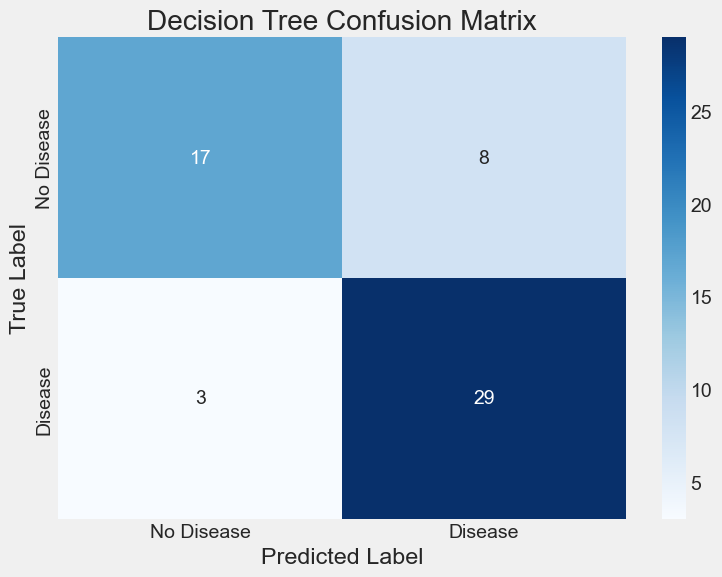

In [29]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

dt_pred = dt_classifier.predict(X_test_scaled)

# Evaluate Model
evaluate_model(y_test, dt_pred, 'Decision Tree')
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree')

## Naive Bayes Classifier

#### Overview:
A **Naive Bayes Classifier** is a probabilistic machine learning algorithm based on **Bayes' Theorem**. It assumes that features are conditionally independent given the target class (the "naive" assumption).

#### Formula:
Bayes’ Theorem calculates the posterior probability:
**P(Class | Features) = [P(Features | Class) * P(Class)] / P(Features)**

#### Variants:
- **Gaussian Naive Bayes:** Assumes normal distribution of continuous features. (used method)
- **Multinomial Naive Bayes:** Suitable for discrete data like text classification (e.g., word counts).
- **Bernoulli Naive Bayes:** Works with binary/boolean input data.

#### Advantages:
- Simple, fast, and efficient for large datasets.
- Performs well with high-dimensional data (e.g., text classification).
- Requires minimal training data.

#### Disadvantages:
- Relies on the assumption of feature independence, which might not hold for many real-world datasets.
- Struggles with continuous features unless properly modeled (e.g., Gaussian distribution).

Naive Bayes is commonly used for spam detection, sentiment analysis, and text classification tasks.

-.- Naive Bayes Performance Metrics -.-
Accuracy Score: 0.7894736842105263
Precision Score: 0.7777777777777778
Recall Score: 0.875
F1 Score: 0.8235294117647058

Confusion Matrix:
[[17  8]
 [ 4 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.78      0.88      0.82        32

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.78        57
weighted avg       0.79      0.79      0.79        57



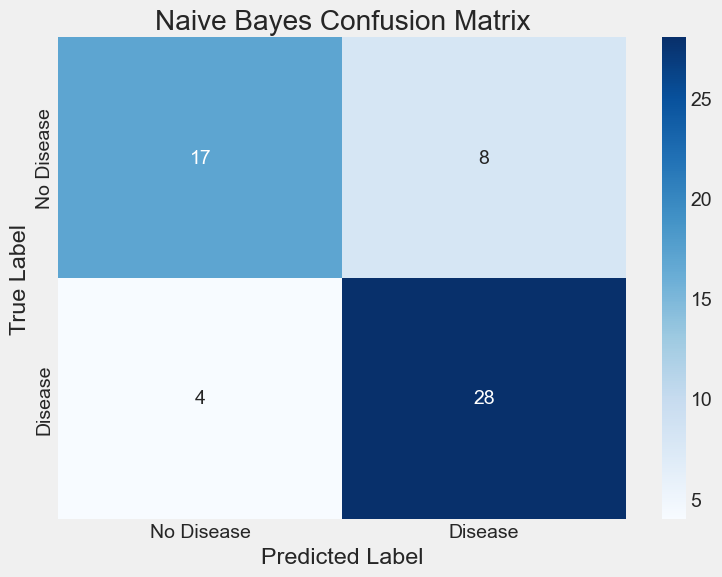

In [30]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

nb_pred = nb_classifier.predict(X_test_scaled)

# Evaluate Model
evaluate_model(y_test, nb_pred, 'Naive Bayes')
plot_confusion_matrix(y_test, nb_pred, 'Naive Bayes')

## KNN Classifier with Hyperparameter Tuning

### Overview:
- Simplistic, instance-based ML algorithm for classification/regression.
- Predictions are based on the **k** nearest points in feature space.

### Key Steps:
1. Compute distances (e.g., Euclidean) between test and training samples.
2. Identify **k** nearest neighbors.
3. Predict the majority class among neighbors.

### Hyperparameter Tuning:
Hyperparameter tuning plays a critical role in determining the optimal value of **k**, ensuring better model performance and avoiding underfitting or overfitting. Cross-validation is used to evaluate model accuracy for different values of **k**, selecting the one that maximizes performance on unseen data.

### Advantages:
- Simple and interpretable, effective for multi-class problems.
- No training phase; works well for small datasets.

### Disadvantages:
- Computationally expensive for large datasets.
- Requires feature scaling.
- Sensitive to irrelevant features and choice of hyperparameters.

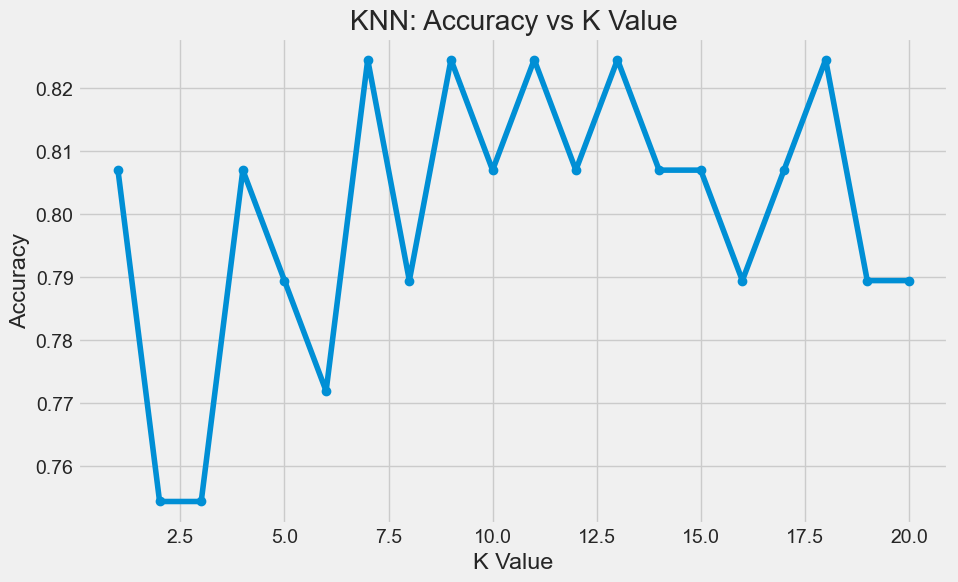

Best K Value: 7
-.- K-Nearest Neighbors Performance Metrics -.-
Accuracy Score: 0.8245614035087719
Precision Score: 0.7894736842105263
Recall Score: 0.9375
F1 Score: 0.8571428571428571

Confusion Matrix:
[[17  8]
 [ 2 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.79      0.94      0.86        32

    accuracy                           0.82        57
   macro avg       0.84      0.81      0.81        57
weighted avg       0.84      0.82      0.82        57



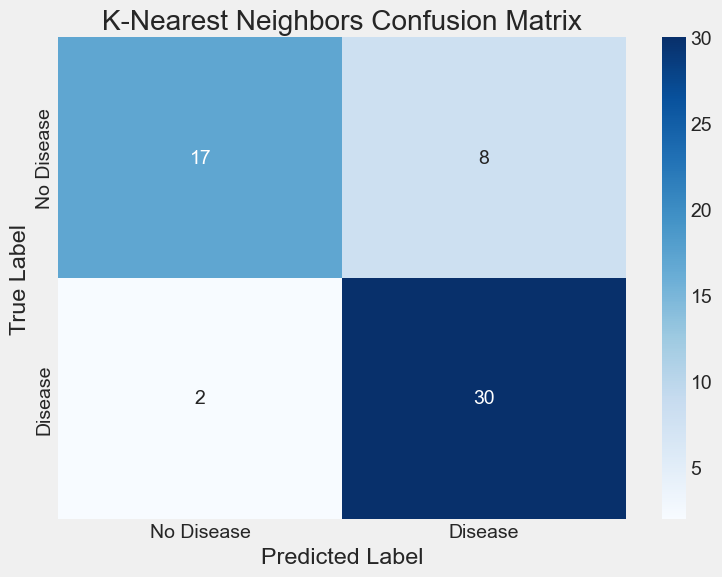

In [31]:
# KNN with Hyperparameter Tuning
knn_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_scores.append(knn.score(X_test_scaled, y_test))

# Plot K values vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, marker='o')
plt.title('KNN: Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

# Best K value
best_k = knn_scores.index(max(knn_scores)) + 1
print(f'Best K Value: {best_k}')

# KNN with Best K
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

# Predictions
knn_pred = knn_classifier.predict(X_test_scaled)

# Evaluate KNN
evaluate_model(y_test, knn_pred, 'K-Nearest Neighbors')
plot_confusion_matrix(y_test, knn_pred, 'K-Nearest Neighbors')

## Model Comparison

This cell compares the performance of three classification models: **Decision Tree**, **Naive Bayes**, and **K-Nearest Neighbors**. The comparison is based on key evaluation metrics, including:

- **Accuracy**: Proportion of correctly classified samples.
- **Precision**: Ability of the model to correctly identify positive instances.
- **Recall**: Ability of the model to find all relevant positive instances.
- **F1 Score**: Harmonic mean of Precision and Recall, balancing false positives and false negatives.

The results are presented in a structured dataframe, providing a comprehensive overview of model performance for further analysis and decision-making.

In [32]:
# Create a performance comparison dataframe
performance_metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors'],
    'Accuracy': [
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, knn_pred)
    ],
    'Precision': [
        precision_score(y_test, dt_pred),
        precision_score(y_test, nb_pred),
        precision_score(y_test, knn_pred)
    ],
    'Recall': [
        recall_score(y_test, dt_pred),
        recall_score(y_test, nb_pred),
        recall_score(y_test, knn_pred)
    ],
    'F1 Score': [
        f1_score(y_test, dt_pred),
        f1_score(y_test, nb_pred),
        f1_score(y_test, knn_pred)
    ]
})

print(performance_metrics)

                 Model  Accuracy  Precision   Recall  F1 Score
0        Decision Tree  0.807018   0.783784  0.90625  0.840580
1          Naive Bayes  0.789474   0.777778  0.87500  0.823529
2  K-Nearest Neighbors  0.824561   0.789474  0.93750  0.857143


### Observations:
- **Accuracy**: KNN achieves the highest accuracy at 82.46%, followed by Decision Tree and Naive Bayes.
- **Precision**: All three models deliver comparable precision, with Decision Tree and KNN leading slightly.
- **Recall**: KNN excels with the highest recall at 93.75%, indicating its superior ability to identify relevant positive cases.
- **F1 Score**: KNN has the highest F1 score at 85.71%, demonstrating the best balance between precision and recall.

### Considerations:
- **F1 Score**: As a balanced metric, it is particularly relevant when evaluating datasets with imbalanced classes. The KNN model outperforms others across all metrics, making it the optimal choice for this data.
- **Hyperparameter Tuning**: KNN benefits significantly from careful hyperparameter tuning, contributing to its superior performance.

### Conclusion:
The K-Nearest Neighbors model delivers the best performance across all metrics—accuracy, precision, recall, and F1 score—indicating its overall suitability for this classification task.